## One dimensional heat diffusion

### trick

In [25]:
import math
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import time

### plot function

In [26]:
def plot(z):
    for t in range (int(np.shape(z)[1]/1000)):
        plt.plot(z[:,t*1000],c=cm.prism(t*1000/np.shape(z)[1]))
    plt.show()

### Cython code

In [27]:
%load_ext Cython

The Cython extension is already loaded. To reload it, use:
  %reload_ext Cython


In [28]:
%%cython --annotate
#cython: cdivision=True

import numpy as np
cimport numpy as np
import time
from libc.math cimport tanh,log,atanh,exp,isnan
ctypedef np.float64_t DOUBLE_t

cdef loop_cython_only(z,r,numx,numt):
    for t in range (numt-1):
        for x in range (numx):
            z0=z[x,t]
            if (x==0):
                z[x,t+1]=z0
            elif(x==numx-1):
                z[x,t+1]=z0
            else:
                z[x,t+1]=r*z[x-1,t]+(1-2*r)*z0+r*z[x+1,t]
    return z

cdef loop_cython_typed(np.ndarray[DOUBLE_t,ndim=2] z,double r,int numx,int numt):
    cdef int t,x
    cdef double z0
    for t in xrange (numt-1):
        for x in xrange (numx):
            z0=z[x,t]
            if (x==0):
                z[x,t+1]=z0
            elif(x==numx-1):
                z[x,t+1]=z0
            else:
                z[x,t+1]=r*z[x-1,t]+(1-2*r)*z0+r*z[x+1,t]
    return z
    
def oneD_cython(numx,numt):
    z=np.zeros((numx,numt))
    z[0,0]=10000
    dt=0.5
    dx=1
    r=dt/dx/dx
    
    loop_time_cython_only=time.time()
    z_cython_only=loop_cython_only(z,r,numx,numt)
    loop_time_cython_only-=time.time()
    loop_time_cython_only*=-1
    print("cython only",loop_time_cython_only,"sec")
    
    loop_time_cython_typed=time.time()
    z_cython_typed=loop_cython_typed(z,r,numx,numt)
    loop_time_cython_typed-=time.time()
    loop_time_cython_typed*=-1
    print("cython typed",loop_time_cython_typed,"sec")

### Python code

In [29]:
def loop_python(z,r,numx,numt):
    for t in range (numt-1):
        for x in range (numx):
            z0=z[x,t]
            if (x==0):
                z[x,t+1]=z0
            elif(x==numx-1):
                z[x,t+1]=z0
            else:
                z[x,t+1]=r*z[x-1,t]+(1-2*r)*z0+r*z[x+1,t]
    return z

def oneD_python(numx,numt):
    z=np.zeros((numx,numt))
    z[0,0]=10000
    dt=0.5
    dx=1
    r=dt/dx/dx
    
    loop_time_python=time.time()
    z_python=loop_python(z,r,numx,numt)
    loop_time_python-=time.time()
    loop_time_python*=-1
    print("python",loop_time_python,"sec")
    
    return z_python

### Main part

In [30]:
numx=501
numt=20001

z_python=oneD_python(numx,numt)
oneD_cython(numx,numt)

python 11.597681760787964 sec
cython only 8.997614622116089 sec
cython typed 0.07129025459289551 sec


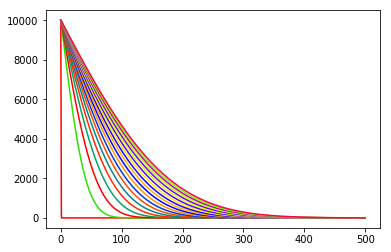

In [31]:
plot(z_python)